# Solving coin combination for \$1

Consider a combinatorial problem of breaking 1 dollar U.S. into all possible combinations of coins. For instance, four quarters, two quarters and five 10 cent dimes, and so on. Now, if we have to add coins up to 1 dollar, we can use at most 1 dollar coin, two 50 cent coins, four quarters, and so on. We can also mix different values. You can already see how we're going to need several nested loops to figure out all the combinations.

In [24]:
combinations = []

for count_100 in range(1+1):
    for count_50 in range(2+1):
        for count_25 in range(4+1):
            for count_10 in range(10+1):
                for count_5 in range(20+1):
                    for count_1 in range(100+1):
                        if 100*count_100 + 50*count_50 + 25*count_25 + 10*count_10 + 5*count_5 + count_1 == 100:
                            combinations.append([count_100, count_50, count_25, count_10, count_5, count_1])

Let's see the first ten possible combinantions:

In [25]:
combinations[:10]

[[0, 0, 0, 0, 0, 100],
 [0, 0, 0, 0, 1, 95],
 [0, 0, 0, 0, 2, 90],
 [0, 0, 0, 0, 3, 85],
 [0, 0, 0, 0, 4, 80],
 [0, 0, 0, 0, 5, 75],
 [0, 0, 0, 0, 6, 70],
 [0, 0, 0, 0, 7, 65],
 [0, 0, 0, 0, 8, 60],
 [0, 0, 0, 0, 9, 55]]

In [26]:
len(combinations)

293

It turns out that there are 293 ways to get $1 out of change. 

This is the solution to the problem. 
However, in this analysis, it often happens that the solution raises a new set of questions. 
 - How many ways to make $2 out of change, or three? 
 - Does the number of combination increase linearly or quadratically?

What we need to do is to take the code we wrote and generalize it to answer those questions. Before we do so, we make a couple of changes to our code to make it faster and easier to generalize. This is an example of **refactoring**. 

## Refactoring
The first change is that we will not loop by count, but by value using the step argument. For instance, instead of the loop over quarters from zero through four, we will loop over the values.

In [27]:
for amount_25 in range(0, 100+1, 25):
    print(amount_25)

0
25
50
75
100


The second change is to recognize that we don't actually need the innermost loop. As long as the total up to that point is less or equal $1, then we can always make up the difference with pennies. So we write one fewer loop.

In [28]:
combinations_amounts = []

for amount_100 in range(0, 100+1, 100):
    for amount_50 in range(0, 100+1, 50):
        for amount_25 in range(0, 100+1, 25):
            for amount_10 in range(0, 100+1, 10):
                for amount_5 in range(0, 100+1, 5):
                    total_so_far = amount_100 + amount_50 + amount_25 + amount_10 + amount_5
                    
                    if total_so_far <= 100:
                        combinations_amounts.append([amount_100, amount_50, amount_25, amount_10, amount_5,
                                                     100 - total_so_far])

In [29]:
combinations_amounts[:10]

[[0, 0, 0, 0, 0, 100],
 [0, 0, 0, 0, 5, 95],
 [0, 0, 0, 0, 10, 90],
 [0, 0, 0, 0, 15, 85],
 [0, 0, 0, 0, 20, 80],
 [0, 0, 0, 0, 25, 75],
 [0, 0, 0, 0, 30, 70],
 [0, 0, 0, 0, 35, 65],
 [0, 0, 0, 0, 40, 60],
 [0, 0, 0, 0, 45, 55]]

In [30]:
len(combinations_amounts) 

293

This looks all right. We're almost done. 

Now we can take our code and make it into a function *find_combinations* by replacing the value 100 everywhere with a variable argument. We also wrap our computation with def and return statements as appropriate for a function.

In [31]:
# [copy code from above]
def find_combinations(total):
    combinations_amounts = []

    for amount_100 in range(0, total+1, 100):
        for amount_50 in range(0, total+1, 50):
            for amount_25 in range(0, total+1, 25):
                for amount_10 in range(0, total+1, 10):
                    for amount_5 in range(0, total+1, 5):
                        total_so_far = amount_100 + amount_50 + amount_25 + amount_10 + amount_5

                        if total_so_far <= total:
                            combinations_amounts.append([amount_100, amount_50, amount_25, amount_10, amount_5,
                                                         total - total_so_far])
    
    return combinations_amounts

So let's see how we can make $2 and $3.

In [32]:
len(find_combinations(200))

2728

In [33]:
len(find_combinations(300))

12318

You may be curious to know how fast this number grows. A Matplotlib plot should give us an idea.

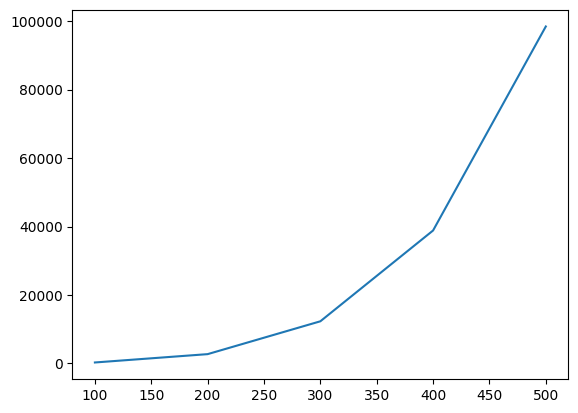

In [34]:
import matplotlib.pyplot as pp  

totals = range(100, 600, 100)
lengths = [len(find_combinations(total)) for total in totals]
pp.plot(totals, lengths)

In fact, this number grows approximately as the fifth power of the total value.